In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("C:\\Users\\Admin\\Downloads\\3.01.+Country+clusters.csv")

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data

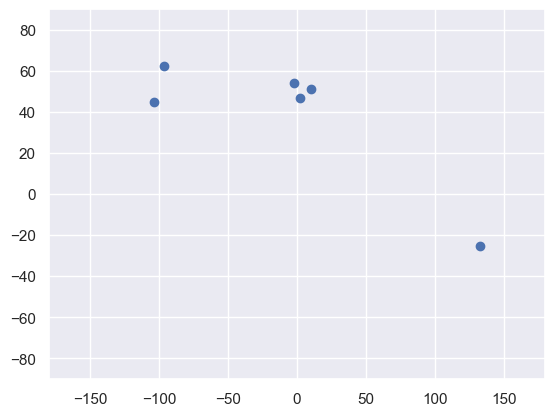

In [4]:
plt.scatter(data["Longitude"],data["Latitude"])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## select features

In [5]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [6]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

## Cluster results

In [7]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 0])

In [8]:
data_with_cluster=data.copy()
data_with_cluster["Cluster"]=identified_clusters
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


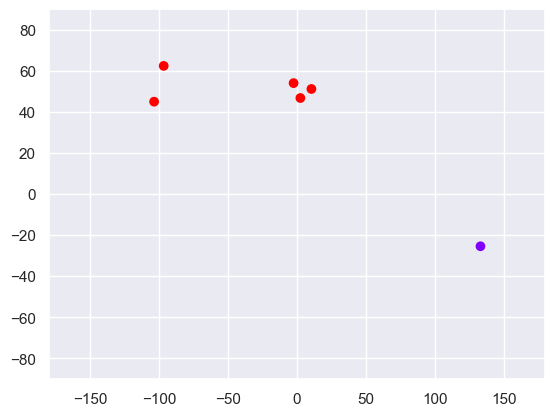

In [9]:
plt.scatter(data_with_cluster["Longitude"],data_with_cluster["Latitude"],c=data_with_cluster["Cluster"],cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Clustering categorical data

In [10]:
## Mapping that data
data_mapped=data.copy()
data_mapped["Language"]=data_mapped["Language"].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## selecting Features

In [11]:
x = data_mapped.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [12]:
kmeans1 = KMeans(3)
kmeans1.fit(x)

KMeans(n_clusters=3)

In [13]:
identified_clusters1=kmeans1.fit_predict(x)
identified_clusters1

array([1, 1, 0, 1, 2, 1])

In [14]:
data_with_cluster1=data_mapped.copy()
data_with_cluster1["Cluster"]=identified_clusters1
data_with_cluster1

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,1


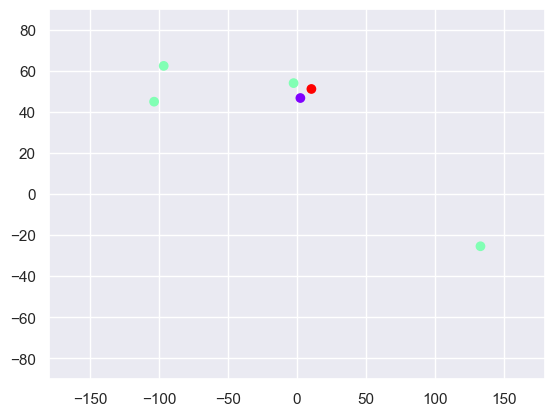

In [15]:
plt.scatter(data_with_cluster1["Longitude"],data_with_cluster1["Latitude"],c=data_with_cluster1["Cluster"],cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting the number of clustesrs using the Elbow Method

In [16]:
#wcss
kmeans1.inertia_

0.0

In [19]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_1380\1642794495.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1380\1642794495.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1380\1642794495.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(x)


In [20]:
wcss

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

Text(0, 0.5, 'Wcss')

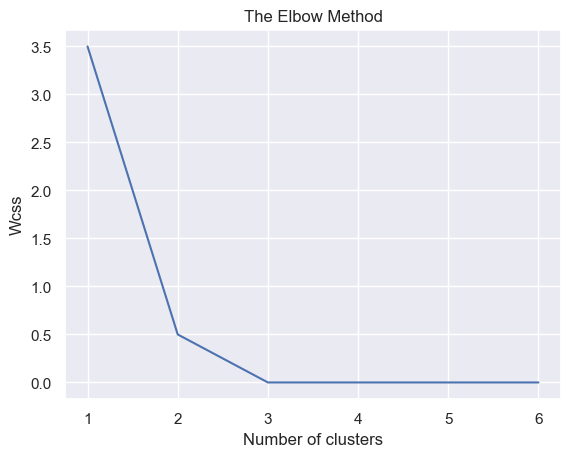

In [22]:
number_of_cluster = range(1,7)
plt.plot(number_of_cluster, wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Wcss")
